# UV excess in low mass stars

## Learning goals

By the end of this tutorial you will be able to:

- Understand UV excess in low mass stars
- Download data directly from URLs and handle data-frames
- Learn how to use a GUVcat catalog query and make selection cuts
- Create a color-color diagram
- **Tentatively**: Create a light curve out of gPhoton
- **Tentatively**: add Swift UVOT time-tagged observations based on metadata (depending on length of tutorial)
- **Tentatively**: add PS1 time series for low-cadence but longer baselines and multicolor (depending on length of tutorial)

## Introduction

**GALEX background**: The Galaxy Evolution Explorer (GALEX) was a satellite which mission was to produce an All-sky Imaiging Survey (AIS). It observed the sky in two different bands: in the Near UV (NUV) ($1750-27504$ Å) and in the Far UV (FUV) ($1350-1750$ Å). The GALEX database contains over 600 million source measurements in the ultraviolet domain, with some sources having more than one measurement, which could be useful to look for variability. Additionally, this survey has additionally been used to <a href="https://ui.adsabs.harvard.edu/abs/2008ApJ...689.1274S/abstract">accrete binaries</a> or <a href="https://ui.adsabs.harvard.edu/abs/2017ApJ...841...33M/abstract">AGB chromospheres</a>.

**Light curve background**: a light curve represents the brightness variation of an object studied over a period of time. This tool is simple but powerful, especially useful for time-variable objects such as supernovae or variable stars. The plot can show brightness (magnitude) over time, but it can also be represented as any other measure of brightness, such as the count of the number of X-rays over time.

**Defining some terms**:
- **Color-color diagram**:diagram used to compare the apparent magnitudes of objects at different wavelengths.
- **AGB**: Asymptotic Giant Branch. This corresponds to an area of the Herzsprung-Russell diagram where evolved cool luminous stars are found, all low to intermediate mass (0.5-8 solar masses) undergo this period of stellar evolution.

## Imports

- _wget_ to download files directly from URLs.
- _os_ to use functions from the operating system, we will use this to unzip _.gz_ files.
- _pandas_ for data handling, such as _.csv_ files.
- _matplotlib.pyplot_ for plotting data.

In [16]:
import wget
import os
import pandas as pd
import matplotlib.pyplot as plt

_**Warning**: you may need to donwload gPhoton if you have not installed it previously, information about how to install it can be found in the following <a href="https://archive.stsci.edu/prepds/gphoton/#installation">link</a>_.

## GALEX catalog

The GALEX catalog can be accessed via the <a href="http://dolomiti.pha.jhu.edu/uvsky/#GUVcat">author's web site</a>, through <a href="http://mastweb.stsci.edu/gcasjobs">MAST casjobs</a> or from the <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR">SIMBAD Vizier database</a>. Through this tutorial we will use the first approach, and download the data directly from the <a href="http://dolomiti.pha.jhu.edu/uvsky/GUVcat/GUVcat_AIS.html">GALEX catalogs of unique UV sources</a>, but the user is welcome to explore the documentation of the two other options and compare. 

For the example presented here, we will be using the _.csv_ file _GUVCat_AIS_FOV055_glat85_00N__90_00N_. The naming convention for the GUVcat catalog is as follows:
- _AIS_ corresponds to the name of the catalog, _All-sky Imaging Survey_.
- _FOV055_ refers to the 1.1 degree diameter of GALEX field-of-view. 
- _glat85_00N_90_00N_ is the lower and upper Galactic boundaries for this slice. _N_ to indicate the degrees are positive, and negative degrees are indicated with _S_.

More information about the naming convention can be found in the <a href="https://archive.stsci.edu/hlsps/guvcat/hlsp_guvcat_galex_imaging_all_fuv-nuv_v1_readme.txt">GCat README file</a>.

## Data download

Let's use now the _wget_ command to download the corresponding catalog:

In [11]:
url='http://dolomiti.pha.jhu.edu/uvsky/GUVcat/GUVcat_AIS_FOV055/2019/5deglatslices/GUVCat_AIS_FOV055_glat85_00N__90_00N.csv.gz'
wget.download(url)

'GUVCat_AIS_FOV055_glat85_00N__90_00N.csv.gz'

The file has automatically be saved to our current working directory with the filename displayed above. In the <a href="http://dolomiti.pha.jhu.edu/uvsky/GUVcat/GUVcat_AIS.html">GALEX catalogs of unique UV sources</a> all the available catalogs can be accessed in case the reader is curious.

Since the files are compressed, the first step to treat the data is decompress them, in order to do that we can use _gunzip_ option from the _os_ module in Python:

In [15]:
filename = 'GUVCat_AIS_FOV055_glat85_00N__90_00N.csv.gz'
os.system('gunzip ' + filename)

256

The _.gz_ file has been replace by a _.csv_ file in our current working directory with the same filename as before. Now let's explore the different columns this catalog has, one way to load a _.csv_ file is to use the function _read_csv_ from the _pandas_ module:

In [2]:
GUVCat_85_90 = pd.read_csv('GUVCat_AIS_FOV055_glat85_00N__90_00N.csv',low_memory=False)

## File structure and data accessing

Let's display the different column names for the downloaded catalog:

In [25]:
print(GUVCat_85_90.columns.values)

['objid' 'photoextractid' 'mpstype' 'avaspra' 'avaspdec' 'fexptime'
 'nexptime' 'ra' 'dec' 'glon' 'glat' 'tilenum' 'img' 'subvisit'
 'fov_radius' 'type' 'band' 'e_bv' 'istherespectrum' 'chkobj_type'
 'fuv_mag' 'fuv_magerr' 'nuv_mag' 'nuv_magerr' 'fuv_mag_auto'
 'fuv_magerr_auto' 'nuv_mag_auto' 'nuv_magerr_auto' 'fuv_mag_aper_4'
 'fuv_magerr_aper_4' 'nuv_mag_aper_4' 'nuv_magerr_aper_4' 'fuv_mag_aper_6'
 'fuv_magerr_aper_6' 'nuv_mag_aper_6' 'nuv_magerr_aper_6' 'fuv_artifact'
 'nuv_artifact' 'fuv_flags' 'nuv_flags' 'fuv_flux' 'fuv_fluxerr'
 'nuv_flux' 'nuv_fluxerr' 'fuv_x_image' 'fuv_y_image' 'nuv_x_image'
 'nuv_y_image' 'fuv_fwhm_image' 'nuv_fwhm_image' 'fuv_fwhm_world'
 'nuv_fwhm_world' 'nuv_class_star' 'fuv_class_star' 'nuv_ellipticity'
 'fuv_ellipticity' 'nuv_theta_j2000' 'nuv_errtheta_j2000'
 'fuv_theta_j2000' 'fuv_errtheta_j2000' 'fuv_ncat_fwhm_image'
 'fuv_ncat_flux_radius_3' 'nuv_kron_radius' 'nuv_a_world' 'nuv_b_world'
 'fuv_kron_radius' 'fuv_a_world' 'fuv_b_world' 'nuv_weight' '

The different columns included are explained in <a href="https://arxiv.org/pdf/1704.05903.pdf">Bianchi et al. 2017</a>. Some relevant identifiers are:

- _objid_: GALEX identifier for the source.
- _ra_: source’s Right Ascension (degrees).
- _dec_: source’s Declination (degrees).
- _fuv/nuv_mag_: FUV/NUV calibrated magnitude.
- _fuv/nuv_flux_: FUV/NUV calibrated flux (micro Jansky).

Let's take a look now at how the catalog data look like:

In [35]:
GUVCat_85_90

,objid,photoextractid,mpstype,avaspra,avaspdec,fexptime,nexptime,ra,dec,glon,...,groupgiddist,groupgidtot,difffuv,diffnuv,difffuvdist,diffnuvdist,sepas,sepasdist,inlargeobj,largeobjsize
0,6374856500725153893,6374856500724105216,AIS,187.732563,29.523348,95.0,211.0,187.706324,28.976949,189.611010,...,6374856500725153893,6374856500725153893,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,6374856500725153904,6374856500724105216,AIS,187.732563,29.523348,95.0,211.0,187.806253,28.977880,189.229750,...,6374856500725153904,6374856500725153904,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,6374856500725153905,6374856500724105216,AIS,187.732563,29.523348,95.0,211.0,187.713565,28.980523,189.545530,...,6374856500725153905,6374856500725153905,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,6374856500725153908,6374856500724105216,AIS,187.732563,29.523348,95.0,211.0,187.712458,28.975241,189.607300,...,6374856500725153908,6374856500725153908,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,6374856500725153909,6374856500724105216,AIS,187.732563,29.523348,95.0,211.0,187.784015,28.975674,189.337810,...,6374856500725153909,6374856500725153909,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249740,6379324897726826393,6379324897725775872,AIS,198.549110,29.399724,112.0,112.0,197.954885,29.304166,59.976341,...,6379324897726826393,6379324897726826393,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
249741,6379324897726826691,6379324897725775872,AIS,198.549110,29.399724,112.0,112.0,197.924818,29.363264,60.719563,...,6379324897726826691,6379324897726826691,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
249742,6379324897728922302,6379324897725775872,AIS,198.549110,29.399724,112.0,112.0,198.086814,29.039864,56.661587,...,6379324897728922302,6379324897728922302,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
249743,6379324897728922714,6379324897725775872,AIS,198.549110,29.399724,112.0,112.0,198.002140,29.130679,57.951881,...,6379324897728922714,6379324897728922714,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


If we wanted to display only the GALEX identifiers for example, we would have to provide between brackets the column name 'objid' as follows:

In [34]:
print(GUVCat_85_90['objid'])

0         6374856500725153893
1         6374856500725153904
2         6374856500725153905
3         6374856500725153908
4         6374856500725153909
                 ...         
249740    6379324897726826393
249741    6379324897726826691
249742    6379324897728922302
249743    6379324897728922714
249744    6379324897728922891
Name: objid, Length: 249745, dtype: int64


This returns a specific column from our data frame. If, on the other hand, we want to access a specific row we could do so by specifying the row number with the _iloc_ function:

In [36]:
print(GUVCat_85_90.iloc[0])

objid             6374856500725153893
photoextractid    6374856500724105216
mpstype                           AIS
avaspra                    187.732563
avaspdec                    29.523348
                         ...         
diffnuvdist                       0.0
sepas                             0.0
sepasdist                         0.0
inlargeobj                        NaN
largeobjsize                      0.0
Name: 0, Length: 95, dtype: object


Finally, if we wanted to display only a specific value from our data-frame we would need to specify the row number and the column name:

In [43]:
print('GUVCat_85_90.iloc[0][objid] = ',GUVCat_85_90.iloc[0]['objid'])

GUVCat_85_90.iloc[0][objid] =  6374856500725153893


## Data reduction

Before making any selection cuts, let's see how many sources we have in the selected catalog:

In [3]:
n_total = len(GUVCat_85_90)
print('Number of elements: '+str(len(GUVCat_85_90)))

Number of elements: 249745


### Selection criteria: NUV and FUV magnitudes

Since we want to create a color-color comparison between the FUV and NUV magnitudes in the GALEX catalog, we must ensure that all the selected sources have both. This selection cut can be performed by ensuring that _band = 3_ since the _band_ tag corresponds to the band number and can be:
- _band = 1_: NUV
- _band = 2_: FUV
- _band = 3_: both NUV and FUV

In [18]:
print(GUVCat_85_90['band'])

0         1
1         1
2         1
3         1
4         1
         ..
249740    1
249741    1
249742    3
249743    3
249744    3
Name: band, Length: 249745, dtype: int64


Let's first apply this selection cut and see how many elements we have remaining in our data-frame:

In [4]:
GUVCat_85_90 = GUVCat_85_90[GUVCat_85_90['band'] == 3]
n_cut1 = len(GUVCat_85_90)
print('Number of elements (band = 3): '+str(len(GUVCat_85_90)))

Number of elements (band = 3): 36434


### Selection criteria: only one source present

Now, let's ensure that this observation only corresponds to one source. This can be done using the tag _gRank_, which can have the following values:
- _gRank = 0_ if the are no other sources (from different observations) within 2.5"
- _gRank = 1_ if this is the best source of >1 sources within 2.5"
- _gRank = -1_ if this is a primary but has a better source within 2.5"
- _gRank = n (n>1)_ is this is the $n_{th}$ source within 2.5" of the primary

And as displayed below, our sample contains different values for the _gRank_ tag:

In [52]:
print(GUVCat_85_90['gRank'][1035:1050])

11272    0
11273    1
11274    0
11275    0
11276    0
11277    0
11278    0
11279    0
11280    0
11281    1
11282    0
11283    0
11284    0
11285    0
11286    0
Name: gRank, dtype: int64


So in this case our selection criteria will be: _gRank = 0_

In [5]:
GUVCat_85_90 = GUVCat_85_90[GUVCat_85_90['gRank'] == 0]
n_cut2 = len(GUVCat_85_90)
print('Number of elements (band = 3, gRank = 0): '+str(len(GUVCat_85_90)))

Number of elements (band = 3, gRank = 0): 33584


### Selection criteria: not an extended object

Additionally, the GALEX catalog also provides a tag, _inlargeobj_, to identify if the observation is in the footprint of an extended object, such a galaxy or a cluster. If an extended object is present it will have the following form: _inlargeobj = XX:name-of-the-extended-object_, with XX having the following possible values:
- GA = galaxy
- GC = Globular cluster
- OC = open cluster
- SC = other stellar clusters

If no extended object is present, this tag will be null (NaN value), which will be our selection cut criteria.

In [77]:
print(GUVCat_85_90['inlargeobj'][70:90])

1861    OC:MELOTTE111
1862    OC:MELOTTE111
1863    OC:MELOTTE111
1864    OC:MELOTTE111
1865    OC:MELOTTE111
1866    OC:MELOTTE111
1867    OC:MELOTTE111
1868    OC:MELOTTE111
1869    OC:MELOTTE111
1870              NaN
1873    OC:MELOTTE111
1875              NaN
1877    OC:MELOTTE111
1878    OC:MELOTTE111
1880              NaN
1881              NaN
1882    OC:MELOTTE111
1883    OC:MELOTTE111
1884              NaN
1885    OC:MELOTTE111
Name: inlargeobj, dtype: object


In [6]:
GUVCat_85_90 = GUVCat_85_90[GUVCat_85_90['inlargeobj'].isnull()]
n_cut3 = len(GUVCat_85_90)
print('Number of elements (band = 3, gRank = 0, inlargeobj = NaN): '+str(len(GUVCat_85_90)))

Number of elements (band = 3, gRank = 0, inlargeobj = NaN): 32607


### Summary of data reduction

So, as a summary, these are the selection cuts we have performed in the original data set:

| Selection cut | Number of elements |
| :-: | :-: |
| Original table | {{ n_total }} |
| Both NUV and FUV magnitudes | {{ n_cut1 }} |
| Only one object inside 2.5" | {{ n_cut2 }} |
| No extended object | {{ n_cut3 }} |

## Color-color diagram

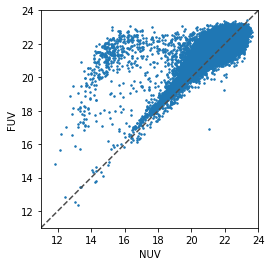

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(GUVCat_85_90['nuv_mag'],GUVCat_85_90['fuv_mag'],'o',markersize=1.5)
plt.plot([11, 24], [11, 24], ls="--", c=".3")
plt.xlim([11,24])
plt.ylim([11,24])
ax.set_aspect('equal')
plt.xlabel('NUV')
plt.ylabel('FUV')
plt.show()

## Exercises

## Additional Resources

For more information about the MAST archive and details about mission data: 

<a href="https://mast.stsci.edu/api/v0/index.html">MAST API</a> <br>
<a href="https://archive.stsci.edu/hlsp/guvcat">GALEX UV Unique Source Catalogs</a> <br> 
<a href="https://archive.stsci.edu/prepds/gphoton/">gPhoton: A Time-Tagged Database Of Every GALEX Photon Event</a>

## About this Notebook

**Author**: Clara Puerto Sánchez <br>
**Updated on**: 18/07/2022

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>